In [5]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 1.7 MB/s eta 0:00:00a 0:00:01


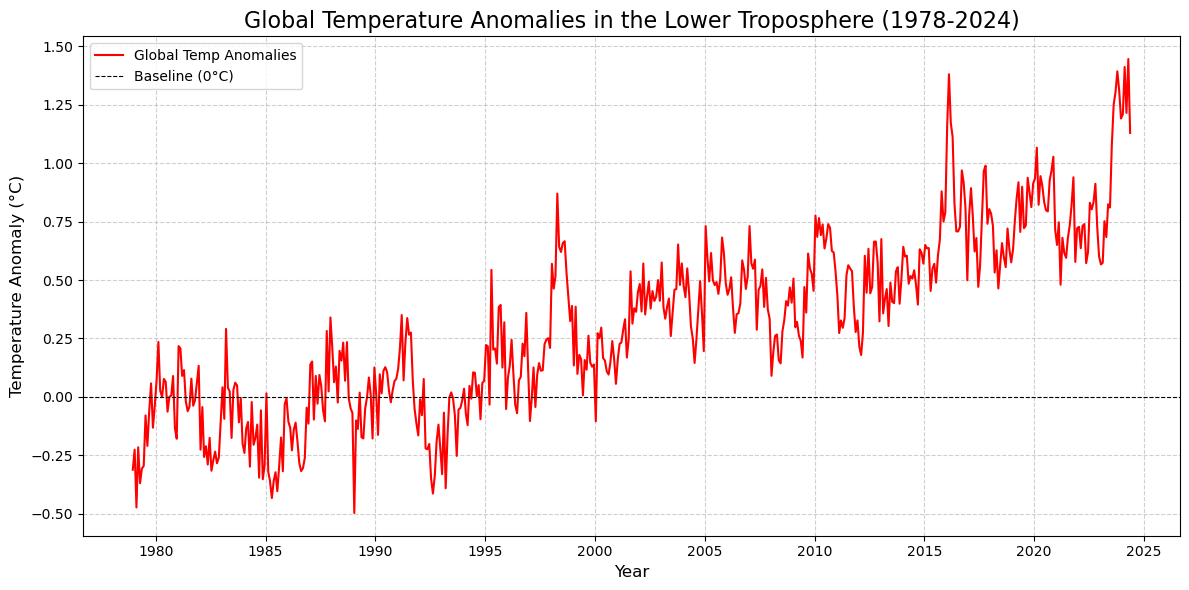

Visualization saved at: /Users/nick/Desktop/USI/I semester/Data Analytics/dataviz portfolio/temp_anomalies_plot.png


In [15]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

# Path to the downloaded dataset
file_path = "/Users/nick/Desktop/USI/I semester/Data Analytics/dataviz portfolio/uat4_tb_v04r00_anom_chtlt_s197812_e202405_c20240615.nc"

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Extract variables
time = dataset.variables['time'][:]  # Time variable
temperature_anomalies = dataset.variables['brightness_temperature_anomaly'][:]  # Temperature anomaly

# Convert time to human-readable format (assuming units like 'days since 1978-01-01')
time_units = dataset.variables['time'].units
time_values = nc.num2date(time, units=time_units)

# Convert cftime to datetime for compatibility with Matplotlib
time_values = [datetime(t.year, t.month, t.day) for t in time_values]

# Calculate global average anomaly (assuming 3D: time, latitude, longitude)
global_avg_anomalies = np.mean(temperature_anomalies, axis=(1, 2))  # Average over latitude and longitude

# Create a DataFrame for easier plotting
data = pd.DataFrame({
    'Date': time_values,
    'Global Temperature Anomaly (°C)': global_avg_anomalies
})

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Global Temperature Anomaly (°C)'], color='red', label='Global Temp Anomalies')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Baseline (0°C)')
plt.title('Global Temperature Anomalies in the Lower Troposphere (1978-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the plot
output_path = "/Users/nick/Desktop/USI/I semester/Data Analytics/dataviz portfolio/temp_anomalies_plot.png"
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()

# Close the dataset
dataset.close()

print(f"Visualization saved at: {output_path}")